In [118]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np

# 1. Root-finding Algorithms

Define functions

In [119]:
# given function
def f(x):
    return 3*x**2 * np.sin(x) - x*np.cos(x) + 4

# derivative function (for Cauchy stopping condition)
def df(x):
    return 6*x * np.sin(x) + 3*x**2 * np.cos(x) - np.cos(x) + x*np.sin(x)

# BISECTION METHOD
def bisection(x0,x1,eps,maxStep=1e5):
    i = 1
    iteration = []
    residual = []
    condition = True
    
    while condition:
        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break

        xNew = (x0 + x1)/2
        
        if f(x0)*f(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew

        errorNew = abs(f(xNew) / df(xNew))

        iteration.append(i)
        residual.append(abs(f(xNew)))

        condition = errorNew > eps
        i += 1
    
    print('*** BISECTION METHOD ***')
    print(f'final x-value: {xNew:0.9e}')
    print(f'iterations: {i-1}')
    print(f'residual: {residual[-1]}\n')

    return iteration, residual

# SECANT METHOD
def secant(x0,x1,eps,maxStep=1e5):
    i = 1
    iteration = []
    residual = []
    condition = True

    while condition:
        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break
        
        if f(x0) == f(x1):
            break

        xNew = x0 - (x1-x0)*f(x0) / (f(x1)-f(x0))
        x0 = x1
        x1 = xNew

        errorNew = abs(f(xNew) / df(xNew))

        iteration.append(i)
        residual.append(abs(f(xNew)))

        condition = errorNew > eps
        i += 1
    
    print('*** SECANT METHOD ***')
    print(f'final x-value: {xNew:0.9e}')
    print(f'iterations: {i-1}')
    print(f'residual: {residual[-1]}\n')

    return iteration, residual

# REGULA-FALSI METHOD
def regulaFalsi(x0,x1,eps,maxStep=1e5):
    i = 1
    iteration = []
    residual = []
    condition = True

    while condition:
        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break
        
        if f(x0) == f(x1):
            break

        xNew = x0 - (x1-x0)*f(x0) / (f(x1)-f(x0))

        if f(x0)*f(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew
        
        errorNew = abs(f(xNew) / df(xNew))

        iteration.append(i)
        residual.append(abs(f(xNew)))

        condition = errorNew > eps
        i += 1
    
    print('*** REGULA-FALSI METHOD ***')
    print(f'final x-value: {xNew:0.9e}')
    print(f'iterations: {i-1}')
    print(f'residual: {residual[-1]}\n')

    return iteration, residual

Plotting

*** BISECTION METHOD ***
final x-value: -1.244258702e+00
iterations: 26
residual: 2.1990578247255144e-08

*** SECANT METHOD ***
final x-value: -1.244258699e+00
iterations: 7
residual: 1.4458856334442771e-09

*** REGULA-FALSI METHOD ***
final x-value: -1.244258694e+00
iterations: 9
residual: 4.8801954033450556e-08



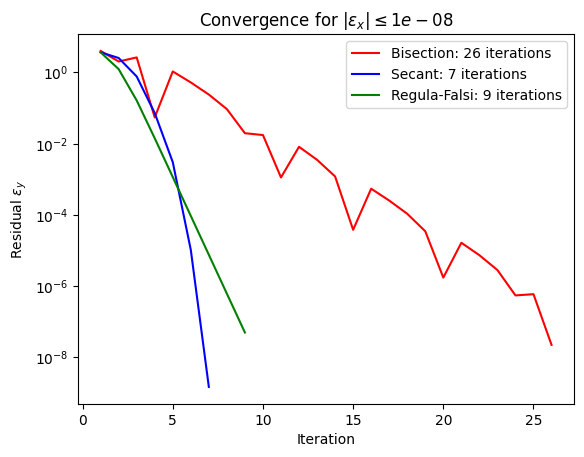

In [120]:
eps = 1e-8
x0 = -2
x1 = 2

s1,e1 = bisection(x0,x1,eps)
s2,e2 = secant(x0,x1,eps)
s3,e3 = regulaFalsi(x0,x1,eps)

plt.semilogy(s1,e1,'r',label=f'Bisection: {s1[-1]} iterations')
plt.semilogy(s2,e2,'b',label=f'Secant: {s2[-1]} iterations')
plt.semilogy(s3,e3,'g',label=f'Regula-Falsi: {s3[-1]} iterations')
plt.xlabel('Iteration')
plt.ylabel(r'Residual $\epsilon_y$')
plt.title(rf'Convergence for $|\epsilon_x| \leq {eps}$')
plt.legend()
plt.show()

# 2. Round-off Error

In [121]:
# given
x = 1.35
# polynomial coefficients
a = 3.15
b = -2.11
c = -4.01
d = 10.33

# PART A
fa1 = a*x**3 + b*x**2 + c*x + d
fa2 = round(round(round(round(a*round(x*round(x*x,3),3),3) + round(b*round(x*x,3),3),3) + round(c*x,3),3) + d,3)
aAbsErr = abs(fa1-fa2)
aRelErr = abs((fa1-fa2)/fa1)

# PART B
fb1 = (((a*x) + b)*x + c)*x + d
fb2 = round(round(round(round(round(round(a*x,3) + b,3)*x,3) + c,3)*x,3) + d,3)
bAbsErr = abs(fb1-fb2)
bRelErr = abs((fb1-fb2)/fb1)

# print outputs
print('*** PART A ***')
print(f'Using default machine precision:  {fa1}')
print(f'Rounding to 3 significant digits: {fa2}')
print(f'Absolute error: {aAbsErr:e}')
print(f'Relative error: {aRelErr:e}\n')

print('*** PART B ***')
print(f'Using default machine precision:  {fb1}')
print(f'Rounding to 3 significant digits: {fb2}')
print(f'Absolute error: {bAbsErr:e}')
print(f'Relative error: {bRelErr:e}\n')

*** PART A ***
Using default machine precision:  8.82120625
Rounding to 3 significant digits: 8.822
Absolute error: 7.937500e-04
Relative error: 8.998202e-05

*** PART B ***
Using default machine precision:  8.821206250000001
Rounding to 3 significant digits: 8.822
Absolute error: 7.937500e-04
Relative error: 8.998202e-05



# 3. Truncation Error

k = 0
Part A sum: 1.0
Part B sum: 1.0

k = 1
Part A sum: -5.0
Part B sum: 5.0

k = 2
Part A sum: 12.5
Part B sum: 12.5

k = 3
Part A sum: -20.833333333333332
Part B sum: 20.833333333333332

k = 4
Part A sum: 26.041666666666668
Part B sum: 26.041666666666668

k = 5
Part A sum: -26.041666666666668
Part B sum: 26.041666666666668

k = 6
Part A sum: 21.70138888888889
Part B sum: 21.70138888888889

k = 7
Part A sum: -15.500992063492063
Part B sum: 15.500992063492063

k = 8
Part A sum: 9.68812003968254
Part B sum: 9.68812003968254

k = 9
Part A sum: -5.3822889109347445
Part B sum: 5.3822889109347445

k = 10
Part A sum: 2.6911444554673722
Part B sum: 2.6911444554673722

Evaluate the function to 4 digits of precision:
True Value: 6.7379e-03
Part A:     8.6404e-01
Part B:     6.8315e-03


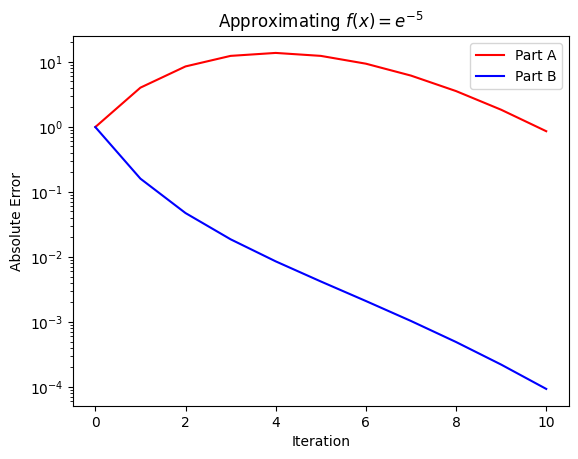

In [122]:
truth = np.exp(-5)

sum1, sum2 = 0, 0
val1, val2 = [], []
absErr1, absErr2 = [], []
relErr1, relErr2 = [], []

for k in range(11):
    term1 = (-1)**k * 5**k / factorial(k)
    term2 = 5**k / factorial(k)
    print(f'k = {k}')
    print(f'Part A sum: {term1}')
    print(f'Part B sum: {term2}\n')

    sum1 += term1
    sum2 += term2

    val1.append(sum1)
    val2.append(1/sum2)
    absErr1.append(abs(truth-sum1))
    absErr2.append(abs(truth-1/sum2))
    
print('Evaluate the function to 4 digits of precision:')
print(f'True Value: {truth:0.4e}')
print(f'Part A:     {val1[-1]:0.4e}')
print(f'Part B:     {val2[-1]:0.4e}')

plt.semilogy(absErr1,'r',label='Part A')
plt.semilogy(absErr2,'b',label='Part B')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.title(r'Approximating $f(x) = e^{-5}$')
plt.legend()
plt.show()

# 4. Taylor Series

In [123]:
x = 4
dx = 0.2
a = x**4 + np.sin(x) + (4*x**3 + np.cos(x))*dx + (12*x**2 - np.sin(x))*dx**2/2+ (24*x - np.cos(x))*dx**3/6
print(a)

x = 3
dx = -0.7
a = x**4 + np.sin(x) + (4*x**3 + np.cos(x))*dx + (12*x**2 - np.sin(x))*dx**2/2 + (24*x - np.cos(x))*dx**3/6
print(a)

310.29647635525333
28.486945782649865
